In [56]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
import joblib
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
from imblearn.under_sampling import RandomUnderSampler 
from statistics import mode
from sklearn.feature_selection import RFE

In [57]:
# how load the xlx file
df = pd.read_excel('datasets/credit_card_clients.xls', header=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [58]:
df.shape

(30000, 25)

In [59]:
# Checking for missing values
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [60]:
# Checking for duplicates
df.duplicated().sum()

0

In [61]:
df.describe()   

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [62]:
# Actually let's drop the ID 
df.drop('ID', axis=1, inplace=True)

<p> The dataset is huge and my pc from stone age, can not help me to visualize. 

In [63]:
# let's check the distribution of the target variable
df['default payment next month'].value_counts()

default payment next month
0    23364
1     6636
Name: count, dtype: int64

In [64]:
# I noticed that in dataset are a lot zeros, let's check how many zeros are in each column
zero_column = (df.drop(columns=['default payment next month']) == 0).sum()
zero_column

# There are many columns have zero values, I dk, do they have any meaning or not. I have to check the dataset description.
# Well pay_0 - pay_6 show the repayment status in September to April. So zero means payment without delay.
# The same with bill_amt1 - bill_amt6, which show the bill statement in September to April. Zero means no bill.
# The same with pay_amt1 - pay_amt6, which show the amount of previous payment in September to April. Zero means no payment.
# But for the education and marriage columns, zero means missing value. I will replace zero with NaN in these columns.

LIMIT_BAL        0
SEX              0
EDUCATION       14
MARRIAGE        54
AGE              0
PAY_0        14737
PAY_2        15730
PAY_3        15764
PAY_4        16455
PAY_5        16947
PAY_6        16286
BILL_AMT1     2008
BILL_AMT2     2506
BILL_AMT3     2870
BILL_AMT4     3195
BILL_AMT5     3506
BILL_AMT6     4020
PAY_AMT1      5249
PAY_AMT2      5396
PAY_AMT3      5968
PAY_AMT4      6408
PAY_AMT5      6703
PAY_AMT6      7173
dtype: int64

In [65]:
# I will use mode() to fill zero values in the education and marriage columns.
df['EDUCATION'] = df['EDUCATION'].replace(0, df['EDUCATION'].mode()[0])
df['MARRIAGE'] = df['MARRIAGE'].replace(0, df['MARRIAGE'].mode()[0])

In [66]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


<Axes: xlabel='AGE', ylabel='default payment next month'>

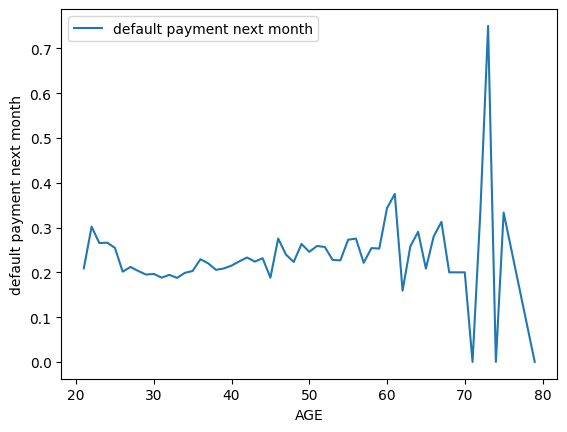

In [67]:
# Let see if age effects on the default payment
age_default_payment = df.groupby('AGE')['default payment next month'].mean()
sns.lineplot(data=age_default_payment, label='default payment next month')

## <span style="color: #20C997;">Personal Analysis</span>
Younger clients  miss payments.<br>
Middle age clients have lower chance of missing payments.<br>
Over 60 years old clients show suddenly high and down. It is a big question, I have to check it

In [68]:
df['AGE'].describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

<Axes: xlabel='AGE', ylabel='Count'>

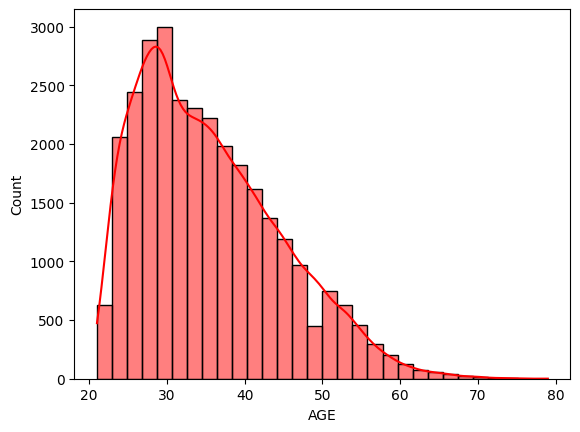

In [69]:
# let's check the distribution of the age why over 60 years old show like that.
sns.histplot(df['AGE'], bins=30, kde=True, color='red')

<b> I think because there are few data for people over 60 years old, so the rate is not stable.

In [70]:
# For better result I group the age into 3 groups
# 20–30
# 31–50
# 51–70
bins = [20, 30, 50, 70]
labels = ['20-30', '31-50', '51-70']
age_group = pd.cut(df['AGE'], bins=bins, labels=labels, right=False)

In [71]:
# let's rename pay_0 to pay_6 with a clear name
df = df.rename(columns={'PAY_0': 'PAY_SEP', 'PAY_2': 'PAY_AUG', 'PAY_3': 'PAY_JUL', 'PAY_4': 'PAY_JUN', 'PAY_5': 'PAY_MAY', 'PAY_6': 'PAY_APR'})

In [72]:
# Let's explore the pays columns, I need to work with negative values, zero and positive values
df[['PAY_SEP', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']].describe()

,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [73]:
# Most of clients pay on time, 50% and 75% are zero. 25% pay in advance.
# The most delayed payment is 8 months.
# let's see the  relationship between most delayed payment and default payment next month
df[df[['PAY_SEP', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']].eq(8).any(axis=1)].groupby('default payment next month').size()

default payment next month
0    11
1    14
dtype: int64

In [74]:
# let's check which age group has the most delayed payment
df[df[['PAY_SEP', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']].eq(8).any(axis=1)].groupby(age_group, observed=True).size() 

AGE
20-30     8
31-50    16
51-70     1
dtype: int64

In [75]:
# lets explore previous repayment status
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0,689,0,0,0,0
1,0,1000,1000,1000,0,2000
2,1518,1500,1000,1000,1000,5000
3,2000,2019,1200,1100,1069,1000
4,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...
29995,8500,20000,5003,3047,5000,1000
29996,1837,3526,8998,129,0,0
29997,0,0,22000,4200,2000,3100
29998,85900,3409,1178,1926,52964,1804


In [76]:
# let's rename the columns to make them more readable
df = df.rename(columns={
     'PAY_AMT1': 'PAY_AMT_SEP',
     'PAY_AMT2': 'PAY_AMT_AUG',
     'PAY_AMT3': 'PAY_AMT_JUL',
     'PAY_AMT4': 'PAY_AMT_JUN',
     'PAY_AMT5': 'PAY_AMT_MAY',
     'PAY_AMT6': 'PAY_AMT_APR'
    }) 

In [77]:
df[['PAY_AMT_SEP', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']].describe()

,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [78]:
# The amount of previous payment decreases over the months from 4 758 to 3 999.

<Axes: >

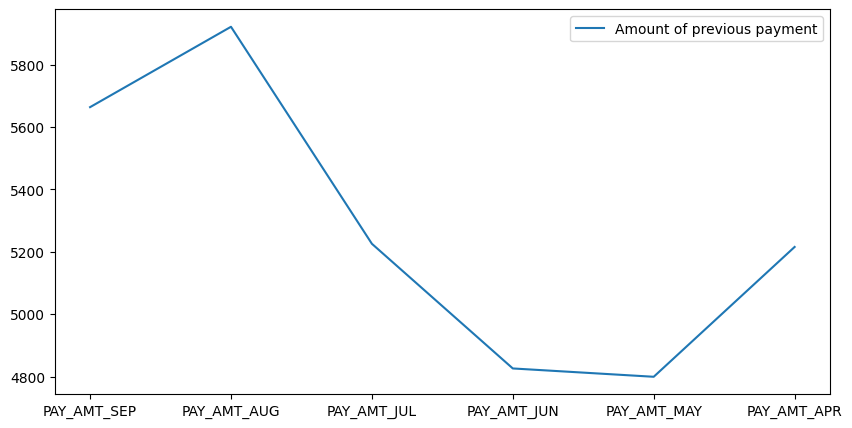

In [79]:
# let's explore amount of payment
amount_pay_avg = df[['PAY_AMT_SEP', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']].mean()
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=amount_pay_avg, label='Amount of previous payment')

In [80]:
# Now let's explore the amount  bill statement
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [81]:
# Amount of bill statement decreases over the months from 51 223 to 38 871.

In [82]:
# let's rename the columns to make them more readable
df = df.rename(columns={
     'BILL_AMT1': 'BILL_AMT_SEP',
     'BILL_AMT2': 'BILL_AMT_AUG',
     'BILL_AMT3': 'BILL_AMT_JUL',
     'BILL_AMT4': 'BILL_AMT_JUN',
     'BILL_AMT5': 'BILL_AMT_MAY',
     'BILL_AMT6': 'BILL_AMT_APR'
    })

<Axes: >

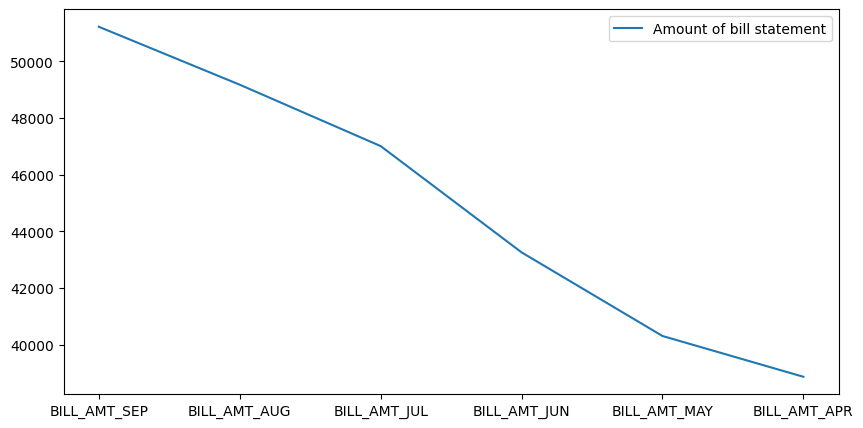

In [83]:
# let's explore the amount of bill statement
fig, ax = plt.subplots(figsize=(10, 5)) 
sns.lineplot(data=df[['BILL_AMT_SEP', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR']].mean(), label='Amount of bill statement')    

In [84]:
# The average bill amount decreases over the months
# Clients might also be spending less on their credit cards

In [85]:
df['LIMIT_BAL'].describe()  

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

<Axes: xlabel='LIMIT_BAL', ylabel='Count'>

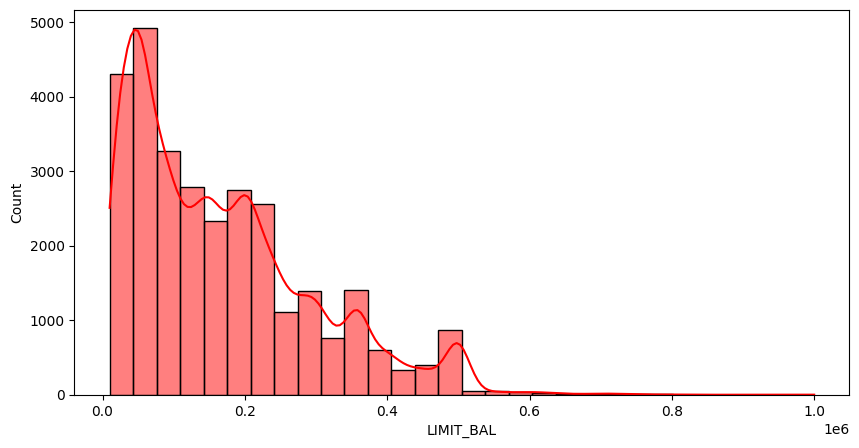

In [86]:
# let's visualize the distribution of the limit balance
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(df['LIMIT_BAL'], bins=30, kde=True, color='red')

In [87]:
# The limit balance is right-skewed, but For credit data, big outliers can be legitimate few millionaires

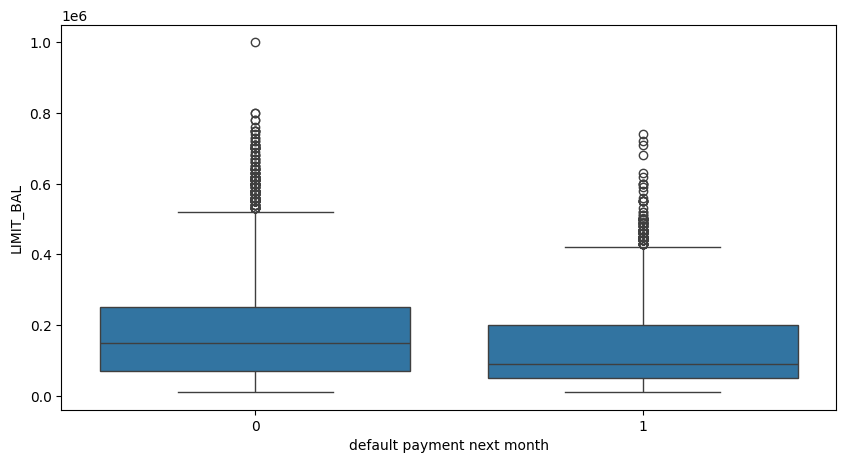

In [88]:
# Let's find if higher credit limits can reduce default risk
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=df, x='default payment next month', y='LIMIT_BAL')
plt.show()

In [91]:
# Ensure X and y are defined
X = df.drop(columns=['default payment next month'])
y = df['default payment next month']

In [92]:
# Check the VIF
X_df = pd.DataFrame(X, columns=df.drop('default payment next month', axis=1).columns)
vif = pd.DataFrame()
vif["Features"] = X_df.columns
vif["VIF"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
vif

,Features,VIF
0,LIMIT_BAL,4.037386
1,SEX,9.108263
2,EDUCATION,6.763729
3,MARRIAGE,6.353889
4,AGE,10.867599
5,PAY_SEP,1.918235
6,PAY_AUG,3.211187
7,PAY_JUL,3.727476
8,PAY_JUN,4.440144
9,PAY_MAY,4.985854


In [93]:
# There are some multicollinearity in the dataset, I need to create new columns to combine all Bill_AMT columns based on their average values
df['BILL_AMT'] = df[['BILL_AMT_SEP', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR']].mean(axis=1)
# I drop the original columns
df = df.drop(['BILL_AMT_SEP', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR'], axis=1)
df.head()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default payment next month,BILL_AMT
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,0,689,0,0,0,0,1,1284.000000
1,120000,2,2,2,26,-1,2,0,0,0,2,0,1000,1000,1000,0,2000,1,2846.166667
2,90000,2,2,2,34,0,0,0,0,0,0,1518,1500,1000,1000,1000,5000,0,16942.166667
3,50000,2,2,1,37,0,0,0,0,0,0,2000,2019,1200,1100,1069,1000,0,38555.666667
4,50000,1,2,1,57,-1,0,-1,0,0,0,2000,36681,10000,9000,689,679,0,18223.166667


In [94]:
rus = RandomUnderSampler(random_state=42)
X, y = rus.fit_resample(X, y)

In [95]:
# let's scale the data
scale = MinMaxScaler()  
X = scale.fit_transform(X) 

In [96]:
X.shape, y.shape

((13272, 23), (13272,))

In [97]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [98]:
logistic = LogisticRegression(max_iter=500)

In [99]:
logistic.fit(x_train, y_train)

LogisticRegression(max_iter=500)

In [100]:
prediction = logistic.predict(x_test)

In [101]:
print(classification_report(y_test, prediction))
# get overall accuracy of the  model and fit it
acc = accuracy_score(y_test, prediction)
print("\n Model overall accuracy:{:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

           0       0.66      0.70      0.68      2010
           1       0.67      0.63      0.65      1972

    accuracy                           0.66      3982
   macro avg       0.66      0.66      0.66      3982
weighted avg       0.66      0.66      0.66      3982


 Model overall accuracy:66.37%


## <span style="color: #20C997;">Personal Analysis</span>
It seems that dataset is too complex for the Logistic Regression. The model got 66.37% accuracy. But generally it works better for 0 or no. 

In [102]:
pipe = Pipeline([
    ('Scaler', MinMaxScaler()), 
    ('logistic', LogisticRegression(random_state=42))
])

In [103]:
param_grid = [{
    'logistic__penalty': ['l1','l2'],
    'logistic__solver': ['saga'],
    'logistic__C': [0.01, 0.1, 1, 10, 100],
    'logistic__max_iter': [2000],
}]

In [104]:
# Grid search
grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,
    verbose=1,
    n_jobs=-1
)

In [105]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Scaler', MinMaxScaler()),
                                       ('logistic',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid=[{'logistic__C': [0.01, 0.1, 1, 10, 100],
                          'logistic__max_iter': [2000],
                          'logistic__penalty': ['l1', 'l2'],
                          'logistic__solver': ['saga']}],
             verbose=1)

In [106]:
train_score = grid_search.score(x_train, y_train)
test_score = grid_search.score(x_test, y_test)
forecast = grid_search.predict(x_test)

In [107]:
print("Best Accuracy for Training Data: {:.2f}%".format(train_score * 100))
print("Test Accuracy for Testing Data: {:.2f}%".format(test_score * 100))
print("\nClassification Report:\n", classification_report(y_test, forecast))

Best Accuracy for Training Data: 68.13%
Test Accuracy for Testing Data: 68.94%

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.86      0.74      2010
           1       0.78      0.52      0.62      1972

    accuracy                           0.69      3982
   macro avg       0.71      0.69      0.68      3982
weighted avg       0.71      0.69      0.68      3982



## <span style="color: #20C997;">Personal Analysis</span>
The fine tuned model got better accuracy and this works better for 1.


In [108]:
# save the dataset
df.to_csv('datasets/credit_clients.csv', index=False)